In [ ]:
import pandas as pd

# Load the datasets
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Cleaning data function
def clean(data):
    # Drop unnecessary columns
    data = data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)
    
    # Fill missing values in numerical columns with their mean
    cols = ["Age", "Fare", "SibSp", "Parch"]
    for col in cols:
        data[col] = data[col].fillna(data[col].mean())
    
    # Fill missing values in 'Embarked' with the mode
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    
    # Convert 'Sex' and 'Embarked' to numerical using one-hot encoding
    data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)
    
    return data

# Apply cleaning
train_cleaned = clean(data)
test_cleaned = clean(test)

train_cleaned.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X = train_cleaned.drop("Survived", axis=1)
y = train_cleaned["Survived"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model using Gradient Boosting
model = GradientBoostingClassifier(n_estimators=200, max_depth=3)
model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Validation Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



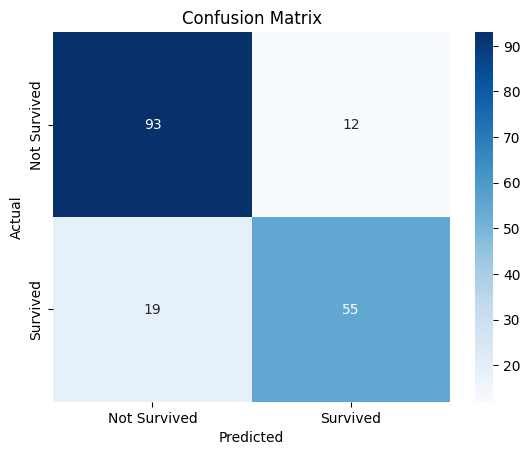

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# evaluate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# visualize using confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
results = pd.DataFrame({
    "PassengerId": test_cleaned.index + 892,  
    "Survived": model.predict(test_cleaned)
})

In [33]:
# Save the results to a CSV file
results.to_csv('result.csv', index=False)